### Чуворкин Михаил А-13а-19

# Лабораторная работа №2

## Вариант 33

### Задача 2.1 
Методом простой итерации  найти вещественные корни алгебраического уравнения $P(x) = 0$ с точностью $\varepsilon = 10^{-8}$

$$ f(x) = x^6 + 0.9x^5 - 0.2x^3 - 1.3x^2 - 0.7x + 0.1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF

In [2]:
def f(x):
    return x**6 + 0.9 * x**5 - 0.2 * x**3 - 1.3 * x**2 - 0.7 * x + 0.1

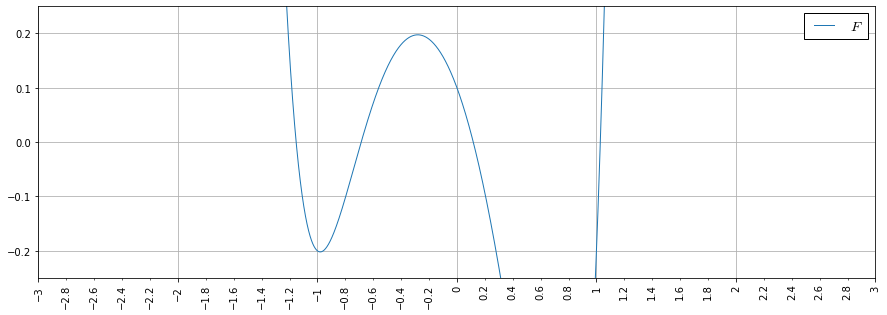

In [3]:
x_data = np.linspace(-2.0, 2, 10000)
fig, axs = plt.subplots(1, figsize=(15, 5))
plt.style.use("classic")
axs.plot(x_data, f(x_data), label='$F$')
axs.grid()
axs.set(ylim=(-0.25,0.25))
axs.xaxis.set_minor_locator(ML(0.2))
axs.xaxis.set_minor_formatter(SF())
axs.tick_params(axis='x', which='minor', rotation=90)
axs.tick_params(axis='x', which='major', rotation=90)
axs.legend()

1. $x_1 \in \left[ -1.5 ; -1 \right]$
2. $x_2 \in \left[ -0.8 ; -0.5 \right]$
3. $x_3 \in \left[ 0 ; 0.5 \right]$
4. $x_4 \in \left[ 1 ; 1.5 \right]$

In [4]:
def df(x):
    return 6 * x**5 + 4.5 * x**4 - 0.6 * x**2 - 2.6 * x - 0.7

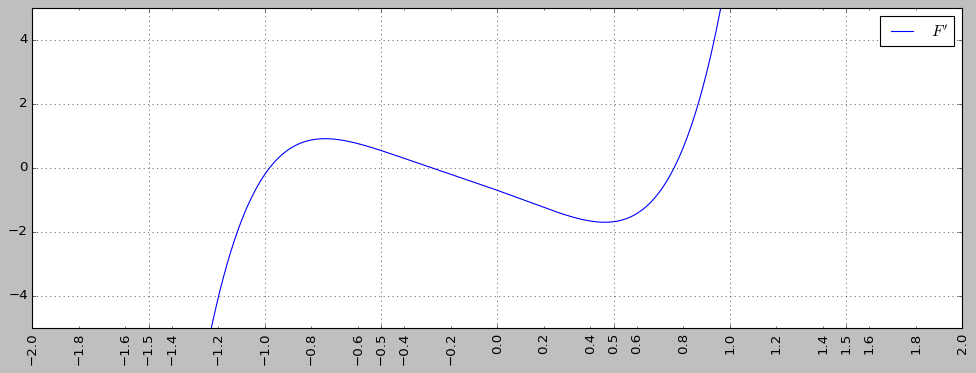

In [5]:
fig, axs = plt.subplots(1, figsize=(15, 5))
plt.style.use("classic")
axs.plot(x_data, df(x_data), label='$F\'$')
axs.grid()
axs.set(ylim=(-5,5))
axs.xaxis.set_minor_locator(ML(0.2))
axs.xaxis.set_minor_formatter(SF())
axs.tick_params(axis='x', which='minor', rotation=90)
axs.tick_params(axis='x', which='major', rotation=90)
axs.legend()

In [6]:
def aux(a, b):
    ab = np.linspace(a, b, 10000)
    M1 = max(df(ab))
    m1 = min(df(ab))
    alpha = 2 / (M1 + m1)
    q = abs((M1 - m1) / (M1 + m1))
    print("[%6s ; %6s] | %9s | %9s | %9s | %9s" % ("a", "b", "M1", "m1", "alpha", "q"))
    print("[%6.2f ; %6.2f] | %9.5f | %9.5f | %9.5f | %9.5f" % (a, b, M1, m1, alpha, q))
    return (alpha, q)

In [7]:
def find_x(a, b, eps):
    alpha, q = aux(a, b)
    old_x = a
    x = old_x - alpha * f(old_x)
    eps1 = (1 - q) / q * eps
    k = 1
    print("eps1 = ", eps1)
    while abs(x - old_x) > eps1:
        # print("| x = %.10f | err = %.10f |" % (x, abs(x - old_x)))
        old_x = x
        x = old_x - alpha * f(old_x)
        k += 1
    print("err = ", abs(x - old_x))
    print("x = ", x)
    print("k = ", k)

In [8]:
find_x(-1.5, -1, 1e-8)

[     a ;      b] |        M1 |        m1 |     alpha |         q
[ -1.50 ;  -1.00] |  -0.20000 | -20.93125 |  -0.09465 |   0.98107
eps1 =  1.9294543261983695e-10
err =  1.4559731198460213e-10
x =  -1.1526476747944712
k =  59


In [9]:
find_x(-0.8, -0.5, 1e-8)

[     a ;      b] |        M1 |        m1 |     alpha |         q
[ -0.80 ;  -0.50] |   0.91343 |   0.54375 |   1.37251 |   0.25370
eps1 =  2.9416980585860434e-08
err =  7.057223583295524e-09
x =  -0.6865410610072825
k =  12


In [10]:
find_x(0, 0.5, 1e-8)

[     a ;      b] |        M1 |        m1 |     alpha |         q
[  0.00 ;   0.50] |  -0.70000 |  -1.69797 |  -0.83404 |   0.41617
eps1 =  1.4028481415053054e-08
err =  1.3323644409979352e-08
x =  0.11700620111383486
k =  10


In [11]:
find_x(1, 1.5, 1e-8)

[     a ;      b] |        M1 |        m1 |     alpha |         q
[  1.00 ;   1.50] |  62.39375 |   6.60000 |   0.02899 |   0.80868
eps1 =  2.365856390724768e-09
err =  2.0377624032619224e-09
x =  1.0276491995229136
k =  59


|           |                   |           |           |           |          |                               |
|-----------|-------------------|-----------|-----------|-----------|----------|-------------------------------|
| Корни:    | [a,b]             |    $M_1$  |   $m_1$   |  $\alpha$ |    $q$   | Корень <br> Число итераций    |
| 1й корень | [ -1.50 ;  -1.00] |  -0.20000 | -20.93125 |  -0.09465 |   0.98107| x =  -1.15264767 <br> k =  59 |
| 2й корень | [ -0.80 ;  -0.50] |   0.91343 |   0.54375 |   1.37251 |   0.25370| x =  -0.68654106 <br> k = 12  |
| 3й корень | [  0.00 ;   0.50] |  -0.70000 |  -1.69797 |  -0.83404 |   0.41617| x =  0.11700620 <br> k = 10   |
| 4й корень | [  1.00 ;   1.50] |  62.39375 |   6.60000 |   0.02899 |   0.80868| x =  1.027649199 <br> k = 59  |

### Задача 2.2
Найти все корни уравнения $f(x) = 0$ с точностью $\varepsilon = 10^{-12}$ на указанном отрезке $\left[ a; b\right]$ методом Ньютона и методом секущих

**Метод Ньютона**
$$x_{n+1} = x_n - \frac{f\left(x_n\right)}{f'\left(x_0\right)}, \qquad n = 0,1,...$$

**Метод секущих**
$$x_{n+1} = x_n - \frac{x_{n - 1} - x_n}{f\left(x_{n-1}\right) - f\left(x_n\right)}f\left(x_n\right), \qquad n = 0,1,...$$

$$f(x) = \sin(3^x) - \cos(3x) + 0.3, \qquad x \in \left[-1, 2\right]$$

In [12]:
def f(x):
    return np.sin(3**x) - np.cos(3 * x) + 0.3

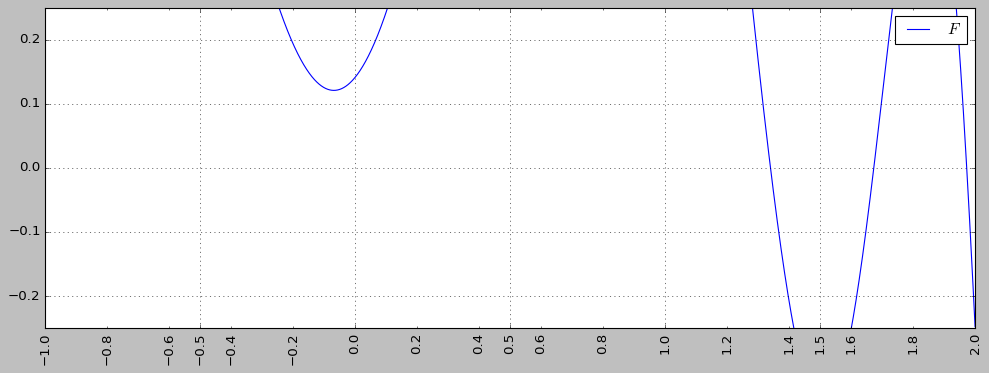

In [13]:
x_data = np.linspace(-1.0, 2.0, 10000)
fig, axs = plt.subplots(1, figsize=(15, 5))
plt.style.use("classic")
axs.plot(x_data, f(x_data), label='$F$')
axs.grid()
axs.set(ylim=(-0.25,0.25))
axs.xaxis.set_minor_locator(ML(0.2))
axs.xaxis.set_minor_formatter(SF())
axs.tick_params(axis='x', which='minor', rotation=90)
axs.tick_params(axis='x', which='major', rotation=90)
axs.legend()

1. $x_1 \in \left[ 1.2; 1.5\right]$
2. $x_2 \in \left[ 1.5; 1.8\right]$
3. $x_3 \in \left[ 1.8; 2.0\right]$

*Решение методом Ньютона*

In [14]:
def df(x):
    return 3 * np.sin(3 * x) + 3**x * np.log(3) * np.cos(3**x)

In [15]:
def x_newton(a, b, eps):
    old_x = (a + b) / 2
    x = old_x - (f(old_x) / df(old_x))
    k = 1
    while abs(x - old_x) >= eps:
        old_x = x
        x = old_x - (f(old_x) / df(old_x))
        k += 1
    print("x = ", x)
    print("k = ", k)

In [16]:
x_newton(1.2, 1.5, 1e-12)

x =  1.3400823839083857
k =  4


In [17]:
x_newton(1.5, 1.8, 1e-12)

x =  1.673294933628927
k =  5


In [18]:
x_newton(1.8, 2.0, 1e-12)

x =  1.9730518797929184
k =  6


*Решение методом секущих*

In [19]:
def x_sec(a, b, eps):
    oldest_x = a
    old_x = b
    x = old_x - (f(old_x) * (old_x - oldest_x)) / (f(old_x) - f(oldest_x))
    k = 1
    while abs(x - old_x) >= eps:
        oldest_x = old_x
        old_x = x
        x = old_x - (f(old_x) * (old_x - oldest_x)) / (f(old_x) - f(oldest_x))
        k += 1
    print("x = ", x)
    print("k = ", k)

In [20]:
x_sec(1.2, 1.5, 1e-12)

x =  1.3400823839083857
k =  8


In [21]:
x_sec(1.5, 1.8, 1e-12)

x =  1.673294933628927
k =  6


In [22]:
x_sec(1.8, 2.0, 1e-12)

x =  1.9730518797929182
k =  8


| Корни уравнения |                    | Число итераций метода Ньютона | Число итераций метода секущих |
|-----------------|--------------------|-------------------------------|-------------------------------|
| 1й корень       | x = 1.340082383908 | k = 4                         | k = 8                         |
| 2й корень       | x = 1.673294933628 | k = 5                         | k = 6                         |
| 3й корень       | x = 1.973051879792 | k = 6                         | k = 8                         |

In [23]:
def const_newton(a, b, n):
    arr = []
    old_x = (a + b) / 2
    x = old_x - (f(old_x) / df(old_x))
    arr.append(abs(f(x)))
    for i in range(n - 1):
        old_x = x
        x = old_x - (f(old_x) / df(old_x))
        arr.append(abs(f(x)))
    return arr

In [24]:
def const_sec(a, b, n):
    arr = []
    oldest_x = a
    old_x = b
    x = old_x - (f(old_x) * (old_x - oldest_x)) / (f(old_x) - f(oldest_x))
    arr.append(abs(f(x)))
    for i in range(n - 1):
        oldest_x = old_x
        old_x = x
        x = old_x - (f(old_x) * (old_x - oldest_x)) / (f(old_x) - f(oldest_x))
        arr.append(abs(f(x)))
    return arr

/home/mike/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


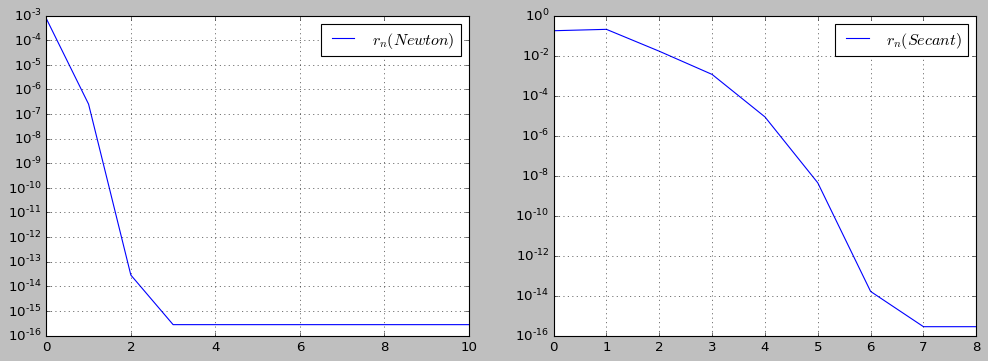

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
n = 11
axs[0].set_yscale('log')
axs[0].plot(range(n) , const_newton(1.2, 1.5, n), label='$r_n (Newton)$')
n = 11
axs[1].set_yscale('log')
axs[1].plot(range(n), const_sec(1.2, 1.5, n), label='$r_n (Secant)$')
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

/home/mike/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


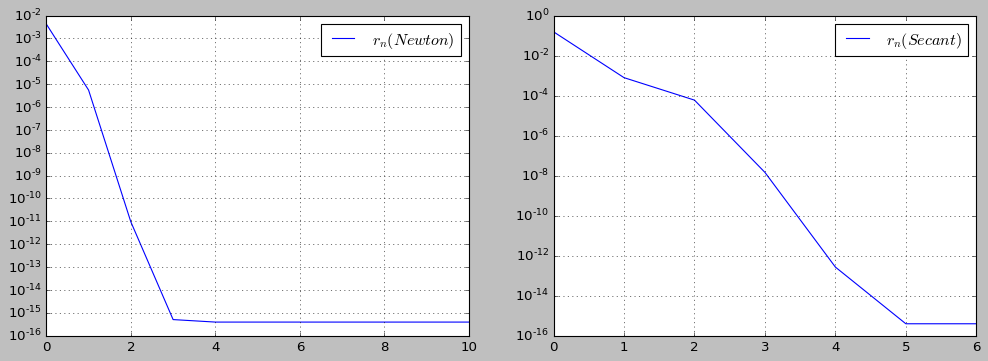

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
n = 11
axs[0].set_yscale('log')
axs[0].plot(range(n), const_newton(1.5, 1.8, n), label='$r_n (Newton)$')
n = 11
axs[1].set_yscale('log')
axs[1].plot(range(n), const_sec(1.5, 1.8, n), label='$r_n (Secant)$')
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

/home/mike/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


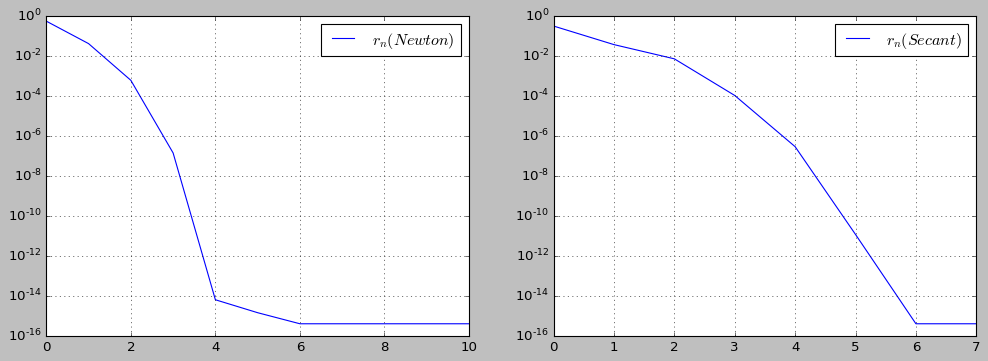

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
n = 11
axs[0].set_yscale('log')
axs[0].plot(range(n), const_newton(1.8, 2.0, n), label='$r_n (Newton)$')
n = 11
axs[1].set_yscale('log')
axs[1].plot(range(n), const_sec(1.8, 2.0, n), label='$r_n (Secant)$')
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

**Вывод:**
1. Метод секущих имеет порядок сходимости $p = \frac{\sqrt{5} + 1}{2} \approx 1.62$ , а метод Ньютона имеет квадратичную сходимость. Это объясняет то, что для метода секущих требуется больше итераций(см. таблицу)
2. По графикам звисимости модуля невязки от номера итерации видно, что метод Ньютона достигает порядка машинного эпсилон быстрее, что опять же объясняется большим порядком сходимости метода Ньютона. (Графики метода секущих имеют правую границу меньше, поскольку значения x перестают изменяться и происходит деление на 0)

### Задание 2.3
Найти корни уравенения и определить их кратность

$$f(x) = 8 (\sqrt{2} - 1) arctg(x)- \pi (\sqrt{2} - 1) - 2x(2\sqrt{2} - 1) + 7 - 4 \sqrt{2} + x^2$$

In [28]:
def f(x):
    k = np.sqrt(2) - 1
    return 8 * k * np.arctan(x) - np.pi * k - 2 * x * (2 * np.sqrt(2) - 1) + 7 - 4 * np.sqrt(2) + x**2

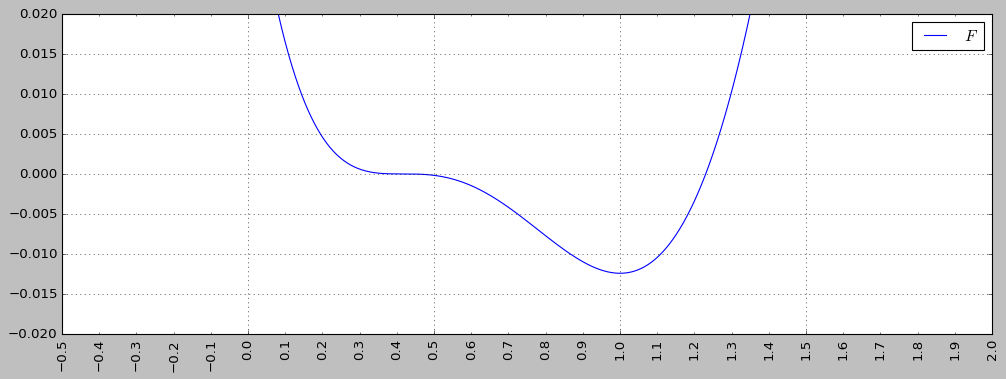

In [29]:
x_data = np.linspace(-0.2, 2, 10000)
fig, axs = plt.subplots(1, figsize=(15, 5))
plt.style.use("classic")
axs.plot(x_data, f(x_data), label='$F$')
axs.grid()
axs.set(ylim=(-0.02,0.02))
axs.xaxis.set_minor_locator(ML(0.1))
axs.xaxis.set_minor_formatter(SF())
axs.tick_params(axis='x', which='minor', rotation=90)
axs.tick_params(axis='x', which='major', rotation=90)
axs.legend()

In [30]:
def df(x):
    return 8 * (np.sqrt(2) - 1) / (1 + x**2) - 2 * (2 * np.sqrt(2) - 1) + 2 * x

1. $x_1 \in \left[ 0.2 ; 0.6 \right]$
2. $x_2 \in \left[ 1.2 ; 1.3 \right]$

Так как в окрестности первого корня функция убывает медленно, использование метода Ньютона нерационально, поэтому будем решать модифицированным методом Ньютона для поиска кратных корней

In [31]:
def x_newton_n(a, b, eps, m):
    old_x = (a + b) / 2
    x = old_x - m * (f(old_x) / df(old_x))
    k = 1
    while abs(x - old_x) >= eps:
        old_x = x
        x = old_x - m * (f(old_x) / df(old_x))
        k += 1
    print("k = ", k)
    return (x, k)

In [32]:
x_1, k_1 = x_newton_n(0.2, 0.6, 1e-9, 1)
print("x1 = ", x_1)
print("Значение производной в точке x1 = ", df(x_1))

k =  52
x1 =  0.41420010653789824
Значение производной в точке x1 =  -1.8106527388539462e-10


In [33]:
x_1, k_1 = x_newton_n(0.2, 0.6, 1e-9, 2)
print("x1 = ", x_1)
print("Значение производной в точке x1 = ", df(x_1))

k =  8
x1 =  0.41420314115540285
Значение производной в точке x1 =  -1.086041256925796e-10


In [34]:
x_2, k_2 = x_newton_n(1.2, 1.3, 1e-5, 1)
print("x2 = ", x_2)
print("Значение производной в точке x2 = ", df(x_2))

k =  3
x2 =  1.2302155533285177
Значение производной в точке x2 =  0.12197764548059142


**Вывод:**
1. Так как значение производной в точке первого корня мало (меньше значения эпсилон), найдем кратность корня 1: модифицированный Метод Ньютона для поиска кратных корней дает наименьшее количеств итераций при n = 2. Поэтому первый корень имеет кратность 2
2. Значение производной в точке второго корня отлично от нуля с учетом погрешности, второй корень имеет кратность 1